# UAS Penambangan Data

## Data Underastanding

### Penjelasan setiap fitur

Dataset ini berisi 14 atribut yang digunakan untuk memprediksi keberadaan penyakit jantung pada pasien.

**Daftar Fitur dan Penjelasannya:**

- **age**: Usia pasien (tahun)
- **sex**: Jenis kelamin pasien  
    &nbsp;&nbsp;&nbsp;• 1 = Laki-laki  
    &nbsp;&nbsp;&nbsp;• 0 = Perempuan
- **cp** (*chest pain type*): Tipe nyeri dada  
    &nbsp;&nbsp;&nbsp;• 0 = Typical angina (nyeri dada tipikal terkait jantung)  
    &nbsp;&nbsp;&nbsp;• 1 = Atypical angina (nyeri dada tidak tipikal)  
    &nbsp;&nbsp;&nbsp;• 2 = Non-anginal pain (bukan nyeri karena angina)  
    &nbsp;&nbsp;&nbsp;• 3 = Asymptomatic (tanpa gejala nyeri dada)
- **trestbps**: Tekanan darah saat istirahat (mm Hg)
- **chol**: Kolesterol serum (mg/dl)
- **fbs** (*fasting blood sugar > 120 mg/dl*): Gula darah puasa > 120 mg/dl  
    &nbsp;&nbsp;&nbsp;• 1 = Ya  
    &nbsp;&nbsp;&nbsp;• 0 = Tidak
- **restecg**: Hasil elektrokardiografi saat istirahat  
    &nbsp;&nbsp;&nbsp;• 0 = Normal  
    &nbsp;&nbsp;&nbsp;• 1 = Kelainan gelombang ST-T  
    &nbsp;&nbsp;&nbsp;• 2 = Hipertrofi ventrikel kiri
- **thalach**: Denyut jantung maksimum yang tercapai
- **exang** (*exercise induced angina*): Angina akibat olahraga  
    &nbsp;&nbsp;&nbsp;• 1 = Ya  
    &nbsp;&nbsp;&nbsp;• 0 = Tidak
- **oldpeak**: Depresi ST akibat olahraga relatif terhadap istirahat
- **slope**: Kemiringan segmen ST saat puncak latihan  
    &nbsp;&nbsp;&nbsp;• 0 = Upsloping  
    &nbsp;&nbsp;&nbsp;• 1 = Flat  
    &nbsp;&nbsp;&nbsp;• 2 = Downsloping
- **ca**: Jumlah pembuluh darah utama (0-3) yang terlihat berwarna saat fluoroskopi
- **thal**: Hasil tes Thallium Stress  
    &nbsp;&nbsp;&nbsp;• 1 = Normal  
    &nbsp;&nbsp;&nbsp;• 2 = Fixed defect (cacat tetap)  
    &nbsp;&nbsp;&nbsp;• 3 = Reversible defect (cacat yang dapat kembali normal)
- **num** (*target*): Diagnosis penyakit jantung  
    &nbsp;&nbsp;&nbsp;• 0 = Tidak ada penyakit jantung  
    &nbsp;&nbsp;&nbsp;• 1, 2, 3, 4 = Ada penyakit jantung


### Eksplorasi Data

In [76]:
import os
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import seaborn as sns
import numpy as np
from ucimlrepo import fetch_ucirepo

sns.set_style('whitegrid')

In [77]:
# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# Gabungkan fitur dan target untuk eksplorasi
df = pd.concat([X, y], axis=1)

print("Lima baris pertama dari dataset:")
display(df.head())

Lima baris pertama dari dataset:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [78]:
# Memeriksa informasi umum dan tipe data
print("Informasi Dataset:")
df.info()

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [79]:
# Memeriksa jumlah missing values di setiap kolom
print("\nJumlah Missing Values per Kolom:")
print(df.isnull().sum())


Jumlah Missing Values per Kolom:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64


In [80]:
# Statistik deskriptif untuk fitur numerik
print("\nStatistik Deskriptif:")
display(df.describe())


Statistik Deskriptif:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


### Visualisasi Data

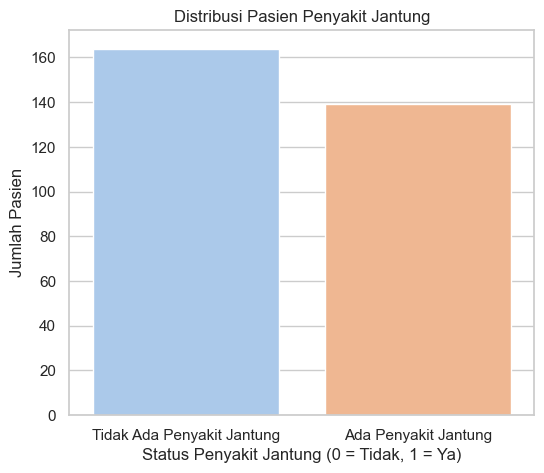

In [81]:
# Visualisasi distribusi variabel target 'num'
# Mengubah 'num' menjadi biner untuk visualisasi yang lebih jelas (0 = Tidak Sakit, 1 = Sakit)
df['has_disease'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

sns.set_theme(style="whitegrid")
plt.figure(figsize=(6, 5))
sns.countplot(x='has_disease', hue='has_disease',
                data=df, palette='pastel', legend=False)
plt.title('Distribusi Pasien Penyakit Jantung')
plt.xlabel('Status Penyakit Jantung (0 = Tidak, 1 = Ya)')
plt.ylabel('Jumlah Pasien')
plt.xticks([0, 1], ['Tidak Ada Penyakit Jantung', 'Ada Penyakit Jantung'])
plt.show()

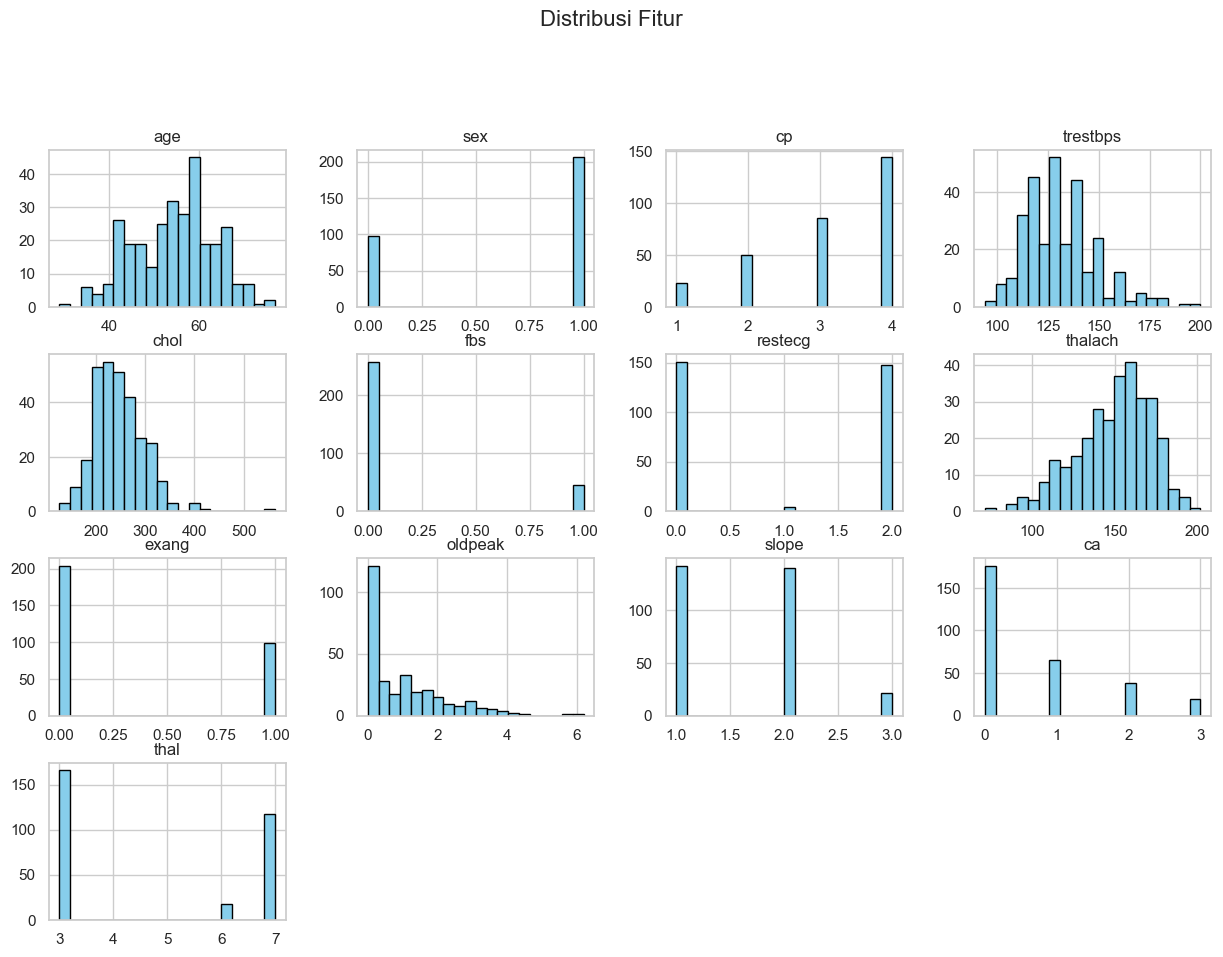

In [82]:
# Visualisasi distribusi fitur menggunakan histogram
numerical_features = ['age','sex','cp','trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
df[numerical_features].hist(bins=20, figsize=(
    15, 10), layout=(4, 4), color='skyblue', edgecolor='black')
plt.suptitle('Distribusi Fitur', y=1.02, size=16)
plt.show()

## Preprocessing Data

In [83]:
# Membuat salinan dataframe agar tidak mengubah data asli
df_processed = df.copy()

# 1. Menangani Missing Values
# Karena jumlah missing values sedikit, kita akan mengisinya dengan nilai yang paling sering muncul (modus)
df_processed['ca'] = df_processed['ca'].fillna(df_processed['ca'].mode()[0])
df_processed['thal'] = df_processed['thal'].fillna(df_processed['thal'].mode()[0])

print("Missing values setelah diisi:")
print(df_processed.isnull().sum())

Missing values setelah diisi:
age            0
sex            0
cp             0
trestbps       0
chol           0
fbs            0
restecg        0
thalach        0
exang          0
oldpeak        0
slope          0
ca             0
thal           0
num            0
has_disease    0
dtype: int64


In [84]:
# 2. Binarisasi Variabel Target
# Kolom 'has_disease' sudah kita buat sebelumnya
y = df_processed['has_disease']
X = df_processed.drop(['num', 'has_disease'], axis=1)

print("Distribusi Target Setelah Binarisasi:")
print(y.value_counts())

Distribusi Target Setelah Binarisasi:
has_disease
0    164
1    139
Name: count, dtype: int64


In [ ]:
# 3. Normalisasi (Scaling) Fitur Numerik
from sklearn.preprocessing import StandardScaler

os.makedirs('ModelUAS', exist_ok=True)

scaler = StandardScaler()

scaler.fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns=X.columns) 

# Simpan scaler menggunakan pickle untuk digunakan di aplikasi Streamlit
scaler_path = os.path.join('ModelUAS', 'scaler.pkl')
with open(scaler_path, 'wb') as file:
    pickle.dump(scaler, file)

print(f"Scaler telah disimpan di: {scaler_path}")
print("\nData fitur setelah di-scaling (5 baris pertama):")
display(X_scaled.head())

Scaler telah disimpan di: ModelUAS\scaler.pkl

Data fitur setelah di-scaling (5 baris pertama):


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.948726,0.686202,-2.251775,0.757525,-0.264900,2.394438,1.016684,0.017197,-0.696631,1.087338,2.274579,-0.711131,0.660004
1,1.392002,0.686202,0.877985,1.611220,0.760415,-0.417635,1.016684,-1.821905,1.435481,0.397182,0.649113,2.504881,-0.890238
2,1.392002,0.686202,0.877985,-0.665300,-0.342283,-0.417635,1.016684,-0.902354,1.435481,1.346147,0.649113,1.432877,1.176752
3,-1.932564,0.686202,-0.165268,-0.096170,0.063974,-0.417635,-0.996749,1.637359,-0.696631,2.122573,2.274579,-0.711131,-0.890238
4,-1.489288,-1.457296,-1.208521,-0.096170,-0.825922,-0.417635,1.016684,0.980537,-0.696631,0.310912,-0.976352,-0.711131,-0.890238


In [86]:
# 4. Membagi Data menjadi Training dan Testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print(f"Ukuran X_train: {X_train.shape}")
print(f"Ukuran X_test: {X_test.shape}")

Ukuran X_train: (242, 13)
Ukuran X_test: (61, 13)


## Klasifikasi (Pemodelan)

In [87]:
# Mengimpor model-model yang akan digunakan
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Inisialisasi model
models = {
    "Support Vector Machine": SVC(kernel='linear', probability=True, random_state=42),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

# Melatih setiap model
for name, model in models.items():
    print(f"Melatih model {name}...")
    model.fit(X_train, y_train)
print("\nSemua model telah dilatih.")

Melatih model Support Vector Machine...
Melatih model Naive Bayes...
Melatih model Decision Tree...

Semua model telah dilatih.


## Evaluasi Model

--- Evaluasi untuk Support Vector Machine ---
Akurasi: 0.8525
Classification Report:
              precision    recall  f1-score   support

 Tidak Sakit       0.90      0.82      0.86        33
       Sakit       0.81      0.89      0.85        28

    accuracy                           0.85        61
   macro avg       0.85      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61



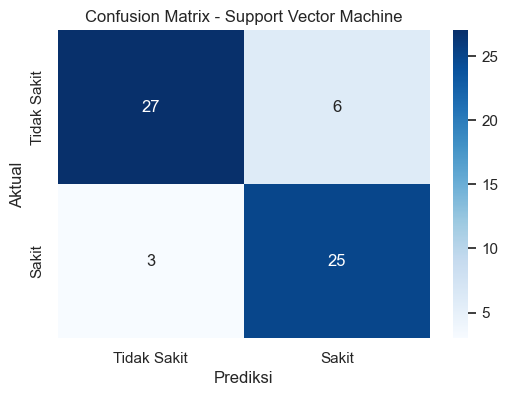



--- Evaluasi untuk Naive Bayes ---
Akurasi: 0.8689
Classification Report:
              precision    recall  f1-score   support

 Tidak Sakit       0.96      0.79      0.87        33
       Sakit       0.79      0.96      0.87        28

    accuracy                           0.87        61
   macro avg       0.88      0.88      0.87        61
weighted avg       0.89      0.87      0.87        61



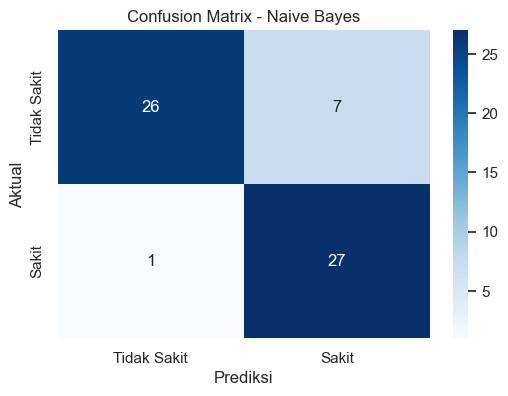



--- Evaluasi untuk Decision Tree ---
Akurasi: 0.7213
Classification Report:
              precision    recall  f1-score   support

 Tidak Sakit       0.81      0.64      0.71        33
       Sakit       0.66      0.82      0.73        28

    accuracy                           0.72        61
   macro avg       0.73      0.73      0.72        61
weighted avg       0.74      0.72      0.72        61



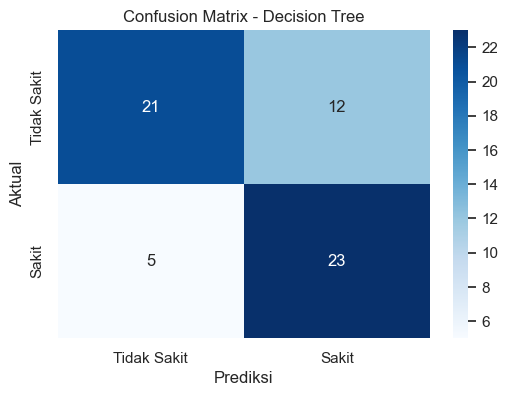

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

evaluation_results = {}

for name, model in models.items():
        # Prediksi pada data test
        y_pred = model.predict(X_test)

        # Menghitung akurasi
        accuracy = accuracy_score(y_test, y_pred)
        evaluation_results[name] = accuracy

        print(f"--- Evaluasi untuk {name} ---")
        print(f"Akurasi: {accuracy:.4f}")

        # Laporan Klasifikasi
        print("Classification Report:")
        print(classification_report(y_test, y_pred,
                target_names=['Tidak Sakit', 'Sakit']))

        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Tidak Sakit', 'Sakit'], yticklabels=['Tidak Sakit', 'Sakit'])
        plt.xlabel('Prediksi')
        plt.ylabel('Aktual')
        plt.title(f'Confusion Matrix - {name}')
        plt.show()
        print("\n" + "="*60 + "\n")

## Perbandingan Model Deployment

Perbandingan Akurasi Model:


,Model,Accuracy
0,Naive Bayes,0.868852
1,Support Vector Machine,0.852459
2,Decision Tree,0.721311


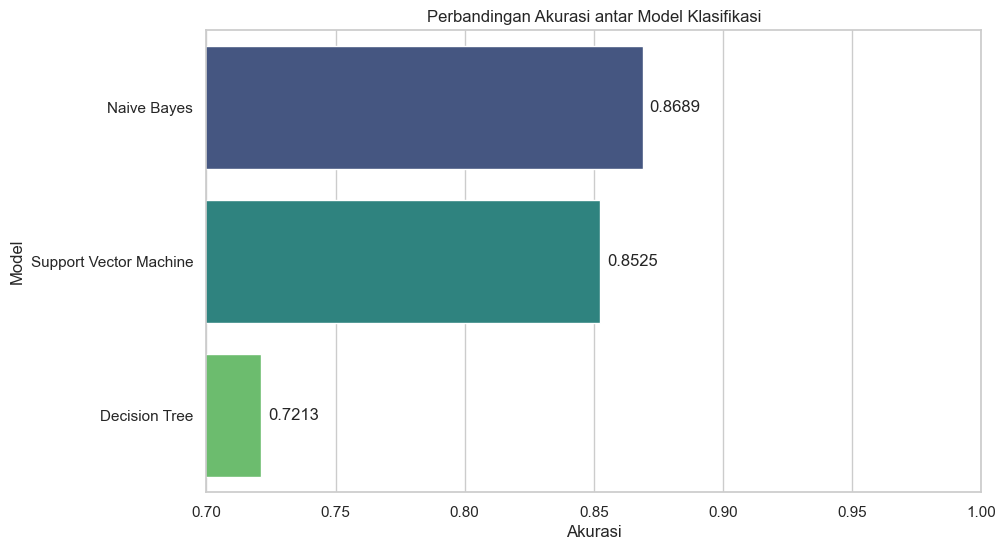

In [91]:
# Membuat DataFrame dari hasil evaluasi untuk perbandingan
df_results = pd.DataFrame(
    list(evaluation_results.items()), columns=['Model', 'Accuracy'])
df_results = df_results.sort_values(
    by='Accuracy', ascending=False).reset_index(drop=True)

print("Perbandingan Akurasi Model:")
display(df_results)

# Visualisasi perbandingan model
plt.figure(figsize=(10, 6))
splot = sns.barplot(
    x='Accuracy',
    y='Model',
    data=df_results,
    palette='viridis',
    hue='Model',     
    legend=False      
)
for p in splot.patches:
    splot.annotate(format(p.get_width(), '.4f'),
                    (p.get_width(), p.get_y() + p.get_height() / 2.),
                    ha='left', va='center',
                    xytext=(5, 0),
                    textcoords='offset points')

plt.title('Perbandingan Akurasi antar Model Klasifikasi')
plt.xlabel('Akurasi')
plt.ylabel('Model')
plt.xlim(0.7, 1.0)
plt.show()

### Memilih Model Terbaik

In [90]:
# Pilih model terbaik
best_model_name = df_results.iloc[0]['Model']
best_model = models[best_model_name]

print(f"Model terbaik adalah: {best_model_name} dengan akurasi {evaluation_results[best_model_name]:.4f}")

os.makedirs('ModelUAS', exist_ok=True)
# Simpan model terbaik ke dalam sebuah file menggunakan pickle
model_path = os.path.join('ModelUAS', 'best_heart_disease_model.pkl')
with open(model_path, 'wb') as file:
    pickle.dump(best_model, file)

print(f"Model terbaik telah disimpan sebagai '{model_path}'")

Model terbaik adalah: Naive Bayes dengan akurasi 0.8689
Model terbaik telah disimpan sebagai 'ModelUAS\best_heart_disease_model.pkl'


## 